In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from XGboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#Import all the required libraries

ModuleNotFoundError: No module named 'XGboost'

In [2]:
os.getcwd()

'C:\\Users\\aneir'

In [8]:
os.chdir('C:\\Users\\aneir\\AcmegradeProject')

In [10]:
df=pd.read_csv('climate_change_indicators.csv')
df

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [11]:
df.head(10)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
5,6,Angola,AO,AGO,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.044,0.828,1.331,1.609,0.870,1.395,1.752,1.162,1.553,1.212
6,7,Anguilla,AI,AIA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.770,0.814,1.051,1.125,0.960,0.664,0.843,1.224,0.893,0.839
7,8,Antigua and Barbuda,AG,ATG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.783,0.744,1.035,1.097,0.958,0.627,0.797,1.131,0.862,0.770
8,9,Argentina,AR,ARG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.442,0.951,0.957,0.488,1.095,0.878,0.760,1.123,1.031,0.643
9,10,"Armenia, Rep. of",AM,ARM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.407,1.283,1.931,1.356,0.889,2.772,1.859,1.954,2.087,1.707


In [12]:
df.tail(10)


,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
215,216,Vanuatu,VU,VUT,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.706,0.585,0.573,1.146,1.131,0.613,0.897,1.226,1.147,1.479
216,217,"Venezuela, Rep. Bolivariana de",VE,VEN,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.941,0.865,1.094,1.098,0.726,0.843,1.235,1.350,0.734,0.533
217,218,Vietnam,VN,VNM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.895,0.540,1.222,1.191,1.121,0.817,1.811,1.477,1.114,1.033
218,219,Wallis and Futuna Islands,WF,WLF,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.773,0.686,0.724,1.267,1.062,0.920,1.379,1.274,1.029,0.951
219,220,West Bank and Gaza,PS,PSE,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.114,0.863,1.326,1.615,0.735,2.007,1.204,1.455,1.787,1.074
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686
224,225,Zimbabwe,ZW,ZWE,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.118,0.025,0.970,1.270,0.088,0.453,0.925,0.389,-0.125,-0.490


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

In [14]:
df.isna().any()
#Data Cleaning

ObjectId     False
Country      False
ISO2          True
ISO3         False
Indicator    False
             ...  
F2018         True
F2019         True
F2020         True
F2021         True
F2022         True
Length: 72, dtype: bool

In [15]:
missing_values = df.iloc[:, :10].isnull().sum()
missing_values

ObjectId               0
Country                0
ISO2                   2
ISO3                   0
Indicator              0
Unit                   0
Source                 0
CTS_Code               0
CTS_Name               0
CTS_Full_Descriptor    0
dtype: int64

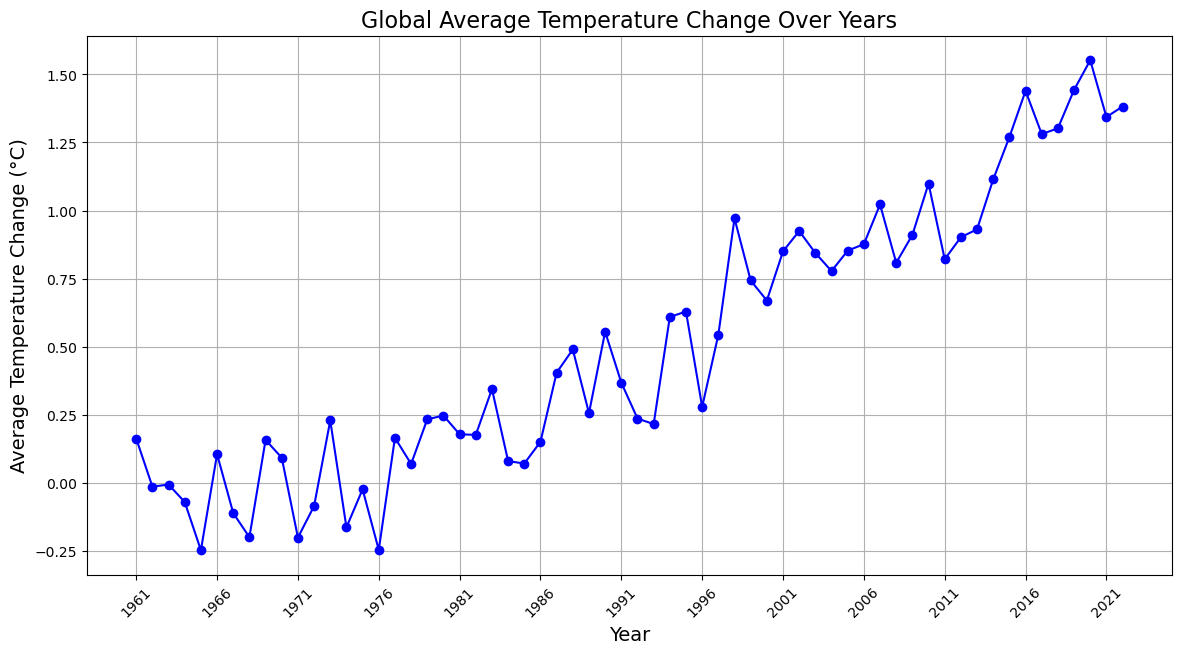

In [16]:
# Time Series Plot of Global Average Temperature Change

# Calculate the global average temperature change for each year
years = [col for col in df.columns if col.startswith('F')]
global_avg_temp_change = df[years].mean()

# Convert years from string 'FYYYY' to integer YYYY for plotting
int_years = [int(year[1:]) for year in years]

# Time Series Plot
plt.figure(figsize=(14, 7))
plt.plot(int_years, global_avg_temp_change, marker='o', linestyle='-', color='b')
plt.title('Global Average Temperature Change Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature Change (°C)', fontsize=14)
plt.xticks(int_years[::5], rotation=45)  # Show every 5th year for clarity
plt.grid(True)
plt.show()

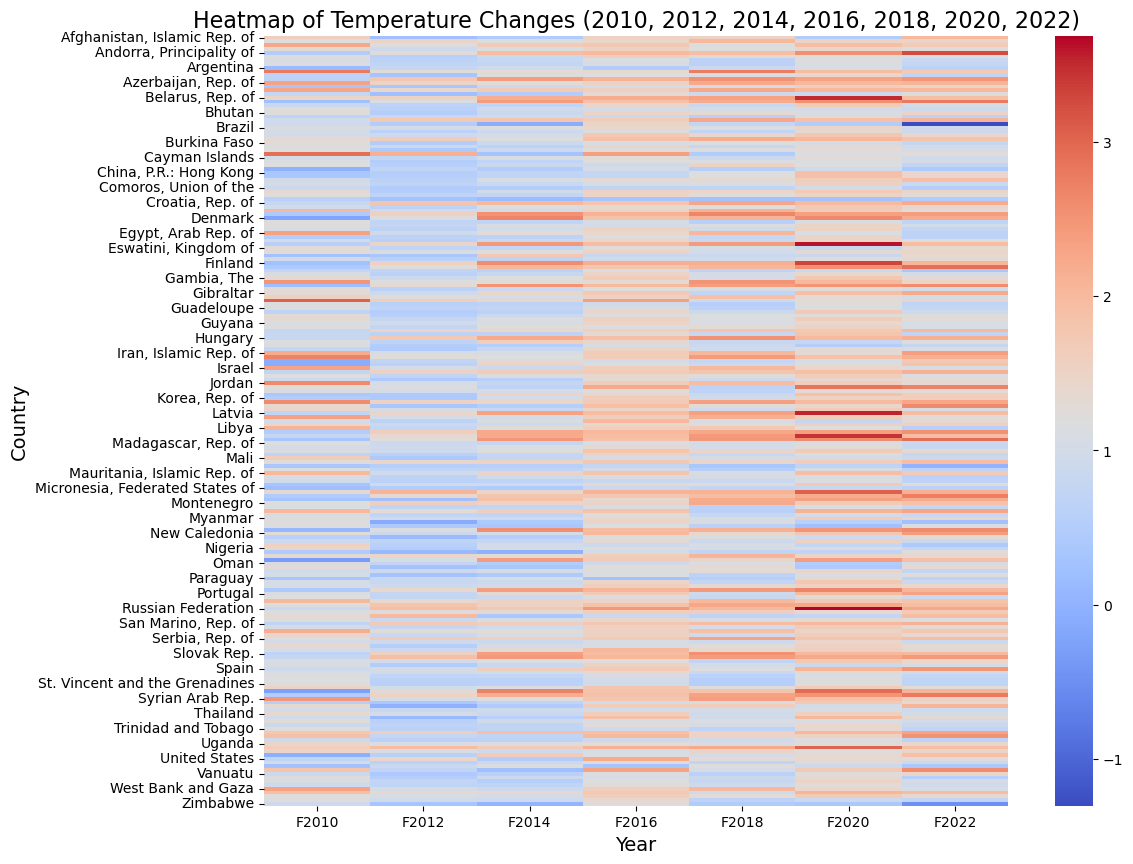

In [17]:
# For the heatmap, we'll select a subset of years for better visibility and clarity
selected_years = ['F2010', 'F2012', 'F2014', 'F2016', 'F2018', 'F2020', 'F2022']
heatmap_data = df.set_index('Country')[selected_years].dropna()  # Drop countries with missing values for simplicity

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Heatmap of Temperature Changes (2010, 2012, 2014, 2016, 2018, 2020, 2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

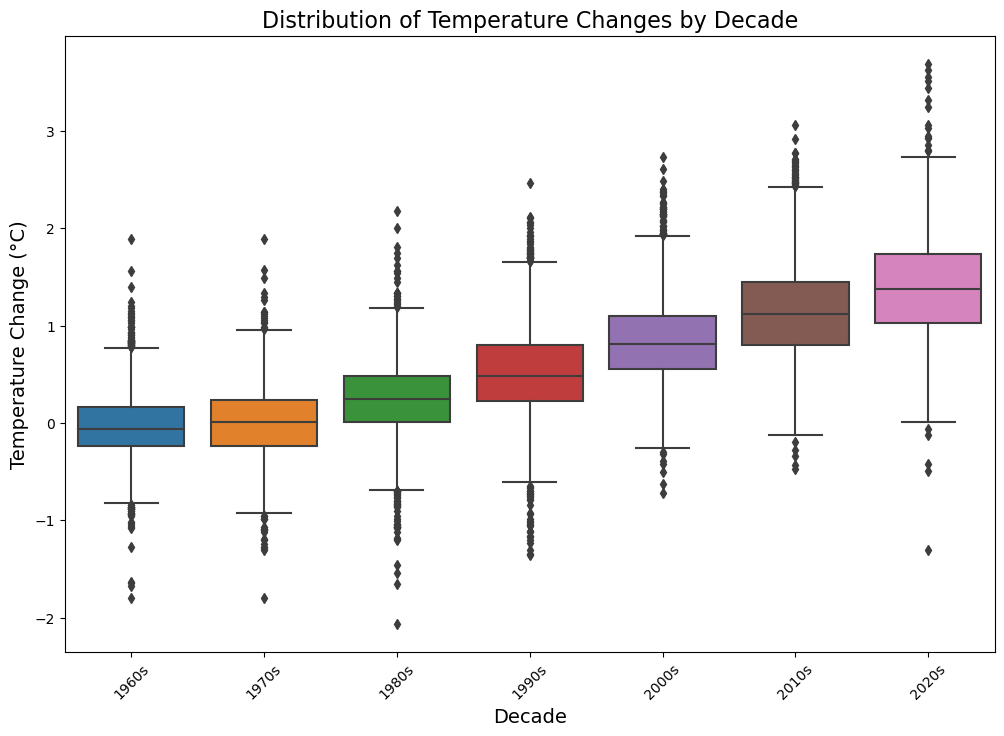

In [18]:
# For the box plot, we'll categorize the years into decades for simplicity

# Creating a new DataFrame with year as a column and a new decade column

decade_data = pd.melt(df, id_vars=['Country'], value_vars=years, var_name='Year', value_name='TempChange')
decade_data['Decade'] = decade_data['Year'].apply(lambda x: x[1:4] + "0s")  # Group years into decades

# Creating the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Decade', y='TempChange', data=decade_data)
plt.title('Distribution of Temperature Changes by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Temperature Change (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [20]:
display (df.shape)

(225, 72)

In [22]:
x = df.iloc [:,:-1]
x

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.223,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.147,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.924,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.265,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.344,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.074,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.972,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822


In [24]:
y = df.iloc[:,1].values
print (y)

['Afghanistan, Islamic Rep. of' 'Albania' 'Algeria' 'American Samoa'
 'Andorra, Principality of' 'Angola' 'Anguilla' 'Antigua and Barbuda'
 'Argentina' 'Armenia, Rep. of' 'Aruba, Kingdom of the Netherlands'
 'Australia' 'Austria' 'Azerbaijan, Rep. of' 'Bahamas, The'
 'Bahrain, Kingdom of' 'Bangladesh' 'Barbados' 'Belarus, Rep. of'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Cayman Islands' 'Central African Rep.' 'Chad' 'Chile'
 'China, P.R.: Hong Kong' 'China, P.R.: Macao' 'China, P.R.: Mainland'
 'Colombia' 'Comoros, Union of the' 'Congo, Dem. Rep. of the'
 'Congo, Rep. of' 'Cook Islands' 'Costa Rica' 'Croatia, Rep. of' 'Cuba'
 'Cyprus' 'Czech Rep.' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Rep.'
 'Ecuador' 'Egypt, Arab Rep. of' 'El Salvador'
 'Equatorial Guinea, Rep. of' 'Eritrea, The State of' 'Estonia, Rep.

ConversionError: Failed to convert value(s) to axis units: array(['Afghanistan, Islamic Rep. of', 'Albania', 'Algeria',
       'American Samoa', 'Andorra, Principality of', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia, Rep. of',
       'Aruba, Kingdom of the Netherlands', 'Australia', 'Austria',
       'Azerbaijan, Rep. of', 'Bahamas, The', 'Bahrain, Kingdom of',
       'Bangladesh', 'Barbados', 'Belarus, Rep. of', 'Belgium', 'Belize',
       'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Rep.',
       'Chad', 'Chile', 'China, P.R.: Hong Kong', 'China, P.R.: Macao',
       'China, P.R.: Mainland', 'Colombia', 'Comoros, Union of the',
       'Congo, Dem. Rep. of the', 'Congo, Rep. of', 'Cook Islands',
       'Costa Rica', 'Croatia, Rep. of', 'Cuba', 'Cyprus', 'Czech Rep.',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Rep.', 'Ecuador',
       'Egypt, Arab Rep. of', 'El Salvador', 'Equatorial Guinea, Rep. of',
       'Eritrea, The State of', 'Estonia, Rep. of',
       'Eswatini, Kingdom of', 'Ethiopia, The Federal Dem. Rep. of',
       'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji, Rep. of',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia, The',
       'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland',
       'Grenada', 'Guadeloupe', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran, Islamic Rep. of', 'Iraq', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan, Rep. of', 'Kenya', 'Kiribati',
       "Korea, Dem. People's Rep. of", 'Korea, Rep. of', 'Kuwait',
       'Kyrgyz Rep.', "Lao People's Dem. Rep.", 'Latvia', 'Lebanon',
       'Lesotho, Kingdom of', 'Liberia', 'Libya', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Madagascar, Rep. of', 'Malawi',
       'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall Islands, Rep. of the', 'Martinique',
       'Mauritania, Islamic Rep. of', 'Mauritius', 'Mayotte', 'Mexico',
       'Micronesia, Federated States of', 'Moldova, Rep. of', 'Monaco',
       'Mongolia', 'Montenegro', 'Montserrat', 'Morocco',
       'Mozambique, Rep. of', 'Myanmar', 'Namibia', 'Nauru, Rep. of',
       'Nepal', 'Netherlands, The', 'New Caledonia', 'New Zealand',
       'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island',
       'North Macedonia, Republic of ', 'Norway', 'Oman', 'Pakistan',
       'Palau, Rep. of', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Philippines', 'Pitcairn Islands', 'Poland, Rep. of', 'Portugal',
       'Puerto Rico', 'Qatar', 'Romania', 'Russian Federation', 'Rwanda',
       'Saint Helena', 'Saint Pierre and Miquelon', 'Samoa',
       'San Marino, Rep. of', 'São Tomé and Príncipe, Dem. Rep. of',
       'Saudi Arabia', 'Senegal', 'Serbia, Rep. of', 'Seychelles',
       'Sierra Leone', 'Singapore', 'Slovak Rep.', 'Slovenia, Rep. of',
       'Solomon Islands', 'Somalia', 'South Africa',
       'South Sudan, Rep. of', 'Spain', 'Sri Lanka',
       'St. Kitts and Nevis', 'St. Lucia',
       'St. Vincent and the Grenadines', 'Sudan', 'Suriname', 'Sweden',
       'Switzerland', 'Syrian Arab Rep.', 'Taiwan Province of China',
       'Tajikistan, Rep. of', 'Tanzania, United Rep. of', 'Thailand',
       'Timor-Leste, Dem. Rep. of', 'Togo', 'Tokelau', 'Tonga',
       'Trinidad and Tobago', 'Tunisia', 'Turkmenistan',
       'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'United States Virgin Islands', 'Uruguay', 'Uzbekistan, Rep. of',
       'Vanuatu', 'Venezuela, Rep. Bolivariana de', 'Vietnam',
       'Wallis and Futuna Islands', 'West Bank and Gaza',
       'Western Sahara', 'World', 'Yemen, Rep. of', 'Zambia', 'Zimbabwe'],
      dtype=object)

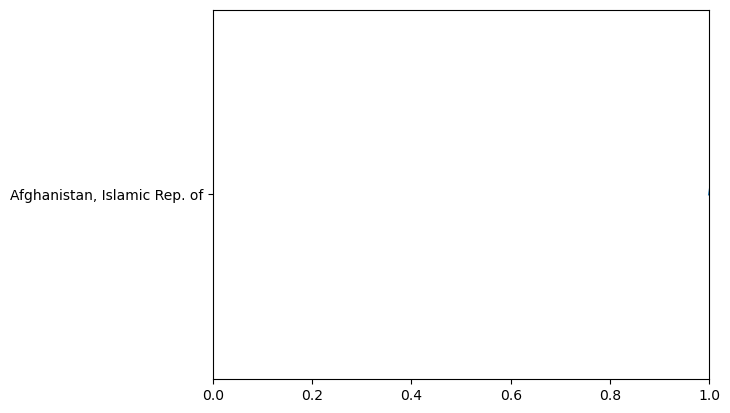

In [25]:
plt.plot (x,y)
plt.show()
print (x)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print ('X Shape-',x.shape)
print ('Y Shape-', y.shape)
print ('X_Train Shape-',x_train.shape)
print ('Y_Train Shape-',y_train.shape)
print ('X_Test Shape-',x_test.shape)
print ('Y_Test Shape-',y_test.shape)
#To split the data into training and test

X Shape- (225, 71)
Y Shape- (225,)
X_Train Shape- (180, 71)
Y_Train Shape- (180,)
X_Test Shape- (45, 71)
Y_Test Shape- (45,)


In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming 'x_train' and 'y_train' are properly defined with your training data

# Generate sample training data (replace this with your dataset loading and preprocessing)
np.random.seed(0)
x_train = np.random.rand(100, 1)  # Example training features (100 samples, 1 feature)
y_train = 2 * x_train[:, 0] + 1 + np.random.randn(100)  # Example training target labels (linear relationship)

# Create a LinearRegression instance
lr = LinearRegression()

# Train the LinearRegression model using the training data
lr.fit(x_train, y_train)

# Optionally, you can print the learned coefficients (slope and intercept)
print("Coefficients (slope):", lr.coef_)  # Slope (coefficients)
print("Intercept:", lr.intercept_)  # Intercept

# Once trained, you can use this model to make predictions on new data (e.g., x_test)


Coefficients (slope): [1.93693502]
Intercept: 1.2221510774472297


In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'x_train', 'x_test', 'y_train' are properly defined with your data
# Generate or load sample data (replace this with your dataset loading and preprocessing)
np.random.seed(0)
x_train = np.random.rand(100, 1)  # Example training features (100 samples, 1 feature)
y_train = 2 * x_train[:, 0] + 1 + np.random.randn(100)  # Example training target labels (linear relationship)
x_test = np.random.rand(20, 1)  # Example test features (20 samples, 1 feature)

# Create a LinearRegression instance
lr = LinearRegression()

# Train the LinearRegression model using the training data
lr.fit(x_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(x_test)

# Print the predicted values
print("Predicted Values:")
print(y_pred)


Predicted Values:
[1.62400713 2.04473923 1.94689402 2.12006655 1.75989984 2.35871423
 2.89538325 1.44980265 2.22428079 1.47795842 2.6106617  1.98929299
 2.31733542 1.57715221 1.50271178 2.16748438 1.91094984 3.04370665
 2.70453636 2.67226386]


In [31]:
y_test

array(['Venezuela, Rep. Bolivariana de', 'Trinidad and Tobago',
       'Nauru, Rep. of', 'Madagascar, Rep. of', 'Benin', 'Oman',
       'Namibia', 'Palau, Rep. of', 'Kiribati', 'Mali', 'Israel',
       'São Tomé and Príncipe, Dem. Rep. of', 'Andorra, Principality of',
       'French Polynesia', 'North Macedonia, Republic of ',
       'Aruba, Kingdom of the Netherlands', 'Zimbabwe', 'Portugal',
       'Botswana', 'Austria', 'Brazil', 'Bhutan', 'Cayman Islands',
       'Holy See', 'China, P.R.: Macao', 'Mauritania, Islamic Rep. of',
       'Congo, Rep. of', 'France', 'Mauritius', 'Faroe Islands',
       'Marshall Islands, Rep. of the', 'Puerto Rico', 'Niger', 'Gabon',
       'Mozambique, Rep. of', 'Micronesia, Federated States of', 'Cyprus',
       'Georgia', 'Qatar', 'Haiti', 'Cuba', 'Egypt, Arab Rep. of',
       'Singapore', 'Tonga', 'Tajikistan, Rep. of'], dtype=object)

In [34]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate or load sample data (replace this with your dataset loading and preprocessing)
np.random.seed(0)
x = np.random.rand(100, 1)  # Example features (100 samples, 1 feature)
y = 2 * x[:, 0] + 1 + np.random.randn(100)  # Example target labels (linear relationship)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a LinearRegression instance
lr = LinearRegression()

# Train the LinearRegression model using the training data
lr.fit(x_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(x_test)

# Create DataFrames to organize test data, predicted values, and differences
df_x_test = pd.DataFrame(x_test, columns=['F2012'])  # Test features
df_y_test = pd.DataFrame(y_test, columns=['F2013'])  # Actual test labels
df_y_test_pred = pd.DataFrame(y_pred, columns=['F2014'])  # Predicted test labels

# Concatenate DataFrames to create y_test_pred DataFrame
y_test_pred = pd.concat([df_x_test, df_y_test, df_y_test_pred], axis=1)

# Calculate and add the difference between actual and predicted values
y_test_pred['Difference'] = df_y_test['F2013'] - df_y_test_pred['F2014']

# Display the combined DataFrame with test data, predictions, and differences
print(y_test_pred)


       F2012     F2013     F2014  Difference
0   0.692472  2.472495  2.577794   -0.105298
1   0.102045  1.235920  1.408442   -0.172522
2   0.976459  2.884677  3.140236   -0.255559
3   0.670638  2.191641  2.534551   -0.342909
4   0.666767  1.638966  2.526884   -0.887918
5   0.681820  3.285847  2.556698    0.729150
6   0.461479  0.652474  2.120308   -1.467835
7   0.317983  1.137934  1.836112   -0.698178
8   0.791725  2.180273  2.774366   -0.594093
9   0.548814  0.932477  2.293275   -1.360798
10  0.778157  2.683226  2.747494   -0.064268
11  0.264556  3.396670  1.730297    1.666373
12  0.604846  1.383253  2.404248   -1.020995
13  0.568434  4.046933  2.332134    1.714799
14  0.318569  2.557997  1.837272    0.720725
15  0.423655  3.335562  2.045396    1.290166
16  0.282807  2.692250  1.766445    0.925805
17  0.120197  0.160462  1.444392   -1.283930
18  0.568045  2.344364  2.331363    0.013001
19  0.774234  3.454512  2.739724    0.714788


In [35]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
print (accuracy)

0.1354996889186385


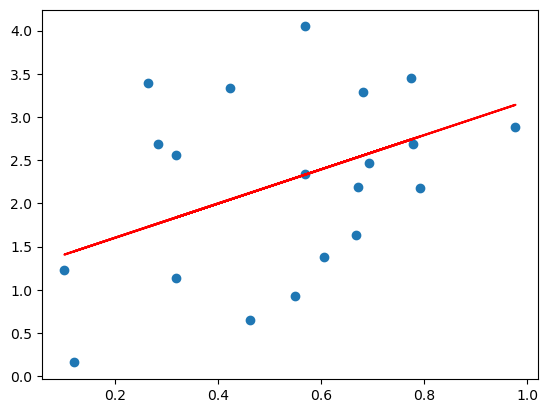

In [36]:
plt.scatter (x_test, y_test)
plt.plot (x_test, y_pred,'r')
plt.show()

In [37]:
print (y_test_pred)

       F2012     F2013     F2014  Difference
0   0.692472  2.472495  2.577794   -0.105298
1   0.102045  1.235920  1.408442   -0.172522
2   0.976459  2.884677  3.140236   -0.255559
3   0.670638  2.191641  2.534551   -0.342909
4   0.666767  1.638966  2.526884   -0.887918
5   0.681820  3.285847  2.556698    0.729150
6   0.461479  0.652474  2.120308   -1.467835
7   0.317983  1.137934  1.836112   -0.698178
8   0.791725  2.180273  2.774366   -0.594093
9   0.548814  0.932477  2.293275   -1.360798
10  0.778157  2.683226  2.747494   -0.064268
11  0.264556  3.396670  1.730297    1.666373
12  0.604846  1.383253  2.404248   -1.020995
13  0.568434  4.046933  2.332134    1.714799
14  0.318569  2.557997  1.837272    0.720725
15  0.423655  3.335562  2.045396    1.290166
16  0.282807  2.692250  1.766445    0.925805
17  0.120197  0.160462  1.444392   -1.283930
18  0.568045  2.344364  2.331363    0.013001
19  0.774234  3.454512  2.739724    0.714788


In [38]:
y_pred_final= lr.predict (x)
print (y_pred_final)

[2.29327532 2.62278575 2.40012403 2.28549125 2.04539623 2.48554524
 2.07298963 2.97251285 3.11489183 1.9657531  2.77436604 2.2538262
 2.33136278 3.03950118 1.34702839 1.37890135 1.24638309 2.85535895
 2.7474938  2.92941508 3.14451163 2.78908827 2.12030847 2.75219243
 1.44058484 2.47371542 1.49025398 3.07727417 2.23987029 2.02758571
 1.73029739 2.7397241  2.10975422 2.33213397 1.24355373 2.42957853
 2.41860691 2.4281892  3.07545044 2.5566977  1.91835213 2.07188993
 2.58801147 1.32561783 2.52688381 2.5345507  1.62300668 1.46168107
 1.83105178 1.92667599 2.33562527 2.07499847 3.16383257 1.40844179
 1.62002441 1.52581663 2.49983312 1.70798882 2.12987716 1.69042952
 1.52118234 1.42494016 2.50621289 1.48001404 1.59567513 1.9366071
 2.83233222 1.39865103 2.86590533 1.39666483 3.14023593 2.13451242
 3.1408333  2.40424775 2.67046516 1.28395232 1.76644453 1.44439167
 1.79285124 1.4414826  1.83611166 2.02679559 1.33338547 2.57779383
 2.32850468 1.73194891 2.24264248 1.39239108 2.34701271 3.046828

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor (n_estimators =5)
rf.fit(x,y)
print (rf)


RandomForestRegressor(n_estimators=5)


In [40]:
y_pred = rf.predict(x)
print (y_pred)

[1.25044692 2.39360761 1.64083984 1.17465602 2.95287443 4.19483457
 2.65337819 2.95614189 1.99745068 2.79345378 2.07842349 2.83344408
 2.49265553 3.50166203 1.80397364 1.42074394 1.05093682 3.3831321
 2.85267149 3.40383296 4.44924537 1.89248048 1.06742488 3.36100917
 0.10223991 4.2091489  1.52755529 2.89249042 3.69207717 3.30178176
 3.05148047 3.14599746 1.14714513 3.51419678 0.60201186 2.65417959
 3.17144341 2.0788579  3.43636742 2.96050655 2.11910656 1.74166184
 2.76776889 2.44683684 2.00995556 2.34156094 1.54375116 2.71244033
 2.121077   2.13488338 2.9789057  2.52587784 2.81000949 1.45097991
 1.38078785 1.33938523 2.98239154 0.75678758 1.7378867  0.57628863
 0.47043693 1.66014198 2.82100162 2.15054114 1.97966826 2.46311125
 2.29435372 1.99509751 2.59643352 0.73061221 2.47913134 2.53109682
 2.47913134 1.3832525  2.02100714 0.66931311 2.26271375 0.16046161
 0.46476326 0.10223991 1.65498998 3.57071339 2.15154001 2.63516584
 1.38226089 2.64286918 1.93986242 0.51311175 2.94858873 3.24074

In [41]:
y

array([ 0.93247717,  3.33120522,  2.67118919,  0.55352268,  3.33556179,
        4.1876774 ,  3.05395399,  2.60362117,  1.8565729 ,  2.82133476,
        2.18027313,  3.28023491,  2.3443641 ,  3.82783231,  1.49843851,
        1.88083177,  1.05093682,  4.45111019,  2.68322559,  3.14201366,
        4.84038738,  1.25055807,  0.65247373,  3.53045506,  0.06342545,
        4.22346323,  0.87308759,  2.14188302,  3.96663867,  3.30983867,
        3.39667018,  3.45451204,  1.05107498,  4.04693285,  0.76957623,
        3.03772739,  3.17144341,  2.0788579 ,  3.50157553,  3.28584727,
        2.09544133,  0.77466312,  2.69350057,  2.44683684,  1.63896557,
        2.1916412 ,  0.98561157,  3.10711632,  2.30315146,  2.13488338,
        1.37047747,  2.41645222,  2.30241502,  1.23592018,  0.78190743,
        1.99905233,  2.88280747,  1.29828445,  2.32862826,  0.39578968,
       -0.17331843,  1.66014198,  2.47933267,  1.91139734,  3.7763095 ,
        2.68192983,  1.72916423,  2.31121884,  1.3599824 ,  0.73

In [42]:
accuracy = r2_score(y,y_pred)
print (accuracy)


0.8071574440065541


In [44]:
result =  pd.concat ([df, pd.DataFrame(y_pred,columns = ['Prediction'])],axis = 1 )
result['Difference'] = result['F2015'] - result['Prediction']
print (result)

     ObjectId                       Country ISO2 ISO3  \
0           1  Afghanistan, Islamic Rep. of   AF  AFG   
1           2                       Albania   AL  ALB   
2           3                       Algeria   DZ  DZA   
3           4                American Samoa   AS  ASM   
4           5      Andorra, Principality of   AD  AND   
..        ...                           ...  ...  ...   
220       221                Western Sahara   EH  ESH   
221       222                         World  NaN  WLD   
222       223                Yemen, Rep. of   YE  YEM   
223       224                        Zambia   ZM  ZMB   
224       225                      Zimbabwe   ZW  ZWE   

                                             Indicator            Unit  \
0    Temperature change with respect to a baseline ...  Degree Celsius   
1    Temperature change with respect to a baseline ...  Degree Celsius   
2    Temperature change with respect to a baseline ...  Degree Celsius   
3    Temperature ch

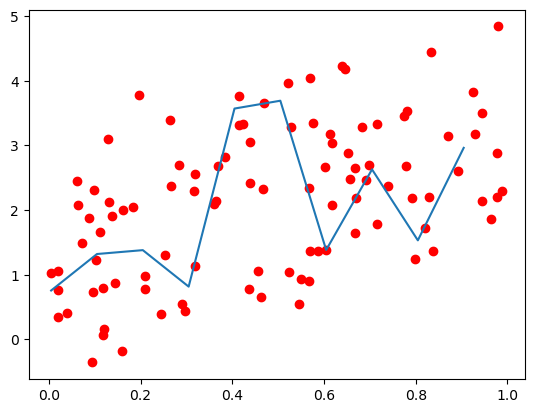

In [45]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color= 'r')
plt.plot(x_grid, rf.predict(x_grid))
plt.show()


In [46]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x = sc_x.fit_transform(x)
print (x)

[[ 0.26368103]
 [ 0.84077065]
 [ 0.45081101]
 [ 0.25004836]
 [-0.17044317]
 [ 0.60041384]
 [-0.12211735]
 [ 1.45326684]
 [ 1.70262292]
 [-0.30992655]
 [ 1.1062415 ]
 [ 0.19459163]
 [ 0.33038568]
 [ 1.57058716]
 [-1.39353293]
 [-1.33771208]
 [-1.56979855]
 [ 1.24808881]
 [ 1.05917867]
 [ 1.37778737]
 [ 1.7544977 ]
 [ 1.13202535]
 [-0.03924528]
 [ 1.06740764]
 [-1.22968241]
 [ 0.57969563]
 [-1.14269413]
 [ 1.63674107]
 [ 0.17014988]
 [-0.20163571]
 [-0.72229299]
 [ 1.04557118]
 [-0.0577295 ]
 [ 0.33173631]
 [-1.57475377]
 [ 0.50239629]
 [ 0.48318109]
 [ 0.49996308]
 [ 1.63354706]
 [ 0.72502704]
 [-0.39294245]
 [-0.12404331]
 [ 0.77986856]
 [-1.43103042]
 [ 0.67281233]
 [ 0.68623978]
 [-0.91019708]
 [-1.19273544]
 [-0.54583633]
 [-0.37836442]
 [ 0.33785081]
 [-0.11859915]
 [ 1.78833551]
 [-1.28597629]
 [-0.9154201 ]
 [-1.08041133]
 [ 0.62543698]
 [-0.76136322]
 [-0.0224871 ]
 [-0.79211577]
 [-1.08852761]
 [-1.25708179]
 [ 0.63661023]
 [-1.16062791]
 [-0.95806431]
 [-0.36097152]
 [ 1.20776

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)
print (x.shape)
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(100, 1)
(80, 1)
(20, 1)
(80,)
(20,)


In [52]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate or load sample data (replace this with your dataset loading and preprocessing)
np.random.seed(0)
x, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an SVC classifier with 'sigmoid' kernel
classifier = SVC(kernel='sigmoid')

# Train the classifier using the training data
classifier.fit(x_train, y_train)

# Print the trained classifier details
print("Trained SVC Classifier:")
print(classifier)


Trained SVC Classifier:
SVC(kernel='sigmoid')


In [53]:
y_pred= classifier.predict(x)
print (y_pred)



[0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0
 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0
 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0]


In [54]:
df_x = pd.DataFrame(x,columns= ['F2016','F2017'])
df_y = pd.DataFrame(y,columns = ['Y'])
df_ypred = pd.DataFrame(y_pred,columns = ['Y Pred'])
result = pd.concat ([df_x,df_y,df_ypred],axis = 1 )
print (result.head(50))


       F2016     F2017  Y  Y Pred
0  -0.766055  0.183325  0       0
1  -0.920383 -0.072317  0       0
2  -0.986585 -0.286920  0       0
3   1.709102 -1.104540  1       1
4   1.987647  1.776245  1       1
5   3.862742  2.633259  1       1
6  -1.128360 -0.422762  0       0
7  -1.100742 -2.560430  0       1
8  -1.537164  1.105026  1       0
9  -0.323727  0.556270  1       0
10 -1.285329 -1.308192  0       0
11  3.359733 -1.795063  1       1
12 -1.270350  1.267804  0       0
13 -0.710234 -1.130582  0       0
14 -1.129331  0.687662  0       0
15  0.248207 -0.509793  1       1
16 -2.472635 -0.486612  0       0
17 -1.115734  1.433701  0       0
18 -1.214147  1.976989  0       0
19 -1.258609 -0.182897  0       0
20 -0.535834  1.106986  1       0
21  0.923281 -1.308135  1       1
22  2.027512 -0.403257  1       1
23  2.187181  2.031968  1       1
24  0.512815  0.432995  1       1
25 -2.811807 -0.345538  0       0
26  0.313381  1.120735  1       1
27  0.272991 -0.321105  1       1
28 -1.189863  

In [55]:
from sklearn.metrics import accuracy_score
print (accuracy_score (y,y_pred))


0.86


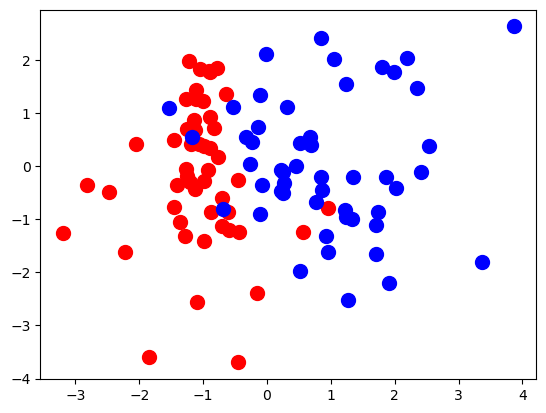

In [56]:
plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y == 1,0],x[y  == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.show()

In [57]:
from sklearn.metrics import classification_report
print(classification_report (y,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        50
           1       0.88      0.84      0.86        50

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [58]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train,y_train)
print (GNB)

GaussianNB()


In [59]:
GNB_pred = GNB.predict(x)
print (GNB_pred)


[0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0
 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0
 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0]


In [60]:
df_GNBpred = pd.DataFrame(GNB_pred,columns = ['Prediction'])
result = pd.concat ([df, df_GNBpred],axis = 1 )
print (result)

     ObjectId                       Country ISO2 ISO3  \
0           1  Afghanistan, Islamic Rep. of   AF  AFG   
1           2                       Albania   AL  ALB   
2           3                       Algeria   DZ  DZA   
3           4                American Samoa   AS  ASM   
4           5      Andorra, Principality of   AD  AND   
..        ...                           ...  ...  ...   
220       221                Western Sahara   EH  ESH   
221       222                         World  NaN  WLD   
222       223                Yemen, Rep. of   YE  YEM   
223       224                        Zambia   ZM  ZMB   
224       225                      Zimbabwe   ZW  ZWE   

                                             Indicator            Unit  \
0    Temperature change with respect to a baseline ...  Degree Celsius   
1    Temperature change with respect to a baseline ...  Degree Celsius   
2    Temperature change with respect to a baseline ...  Degree Celsius   
3    Temperature ch

In [61]:
from sklearn.metrics import accuracy_score
print (accuracy_score (y, GNB_pred))

0.91


In [62]:
from sklearn.metrics import classification_report
print(classification_report (y, GNB_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        50
           1       0.96      0.86      0.91        50

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



In [63]:
cm = confusion_matrix (y , GNB_pred)
print (cm)	


[[48  2]
 [ 7 43]]


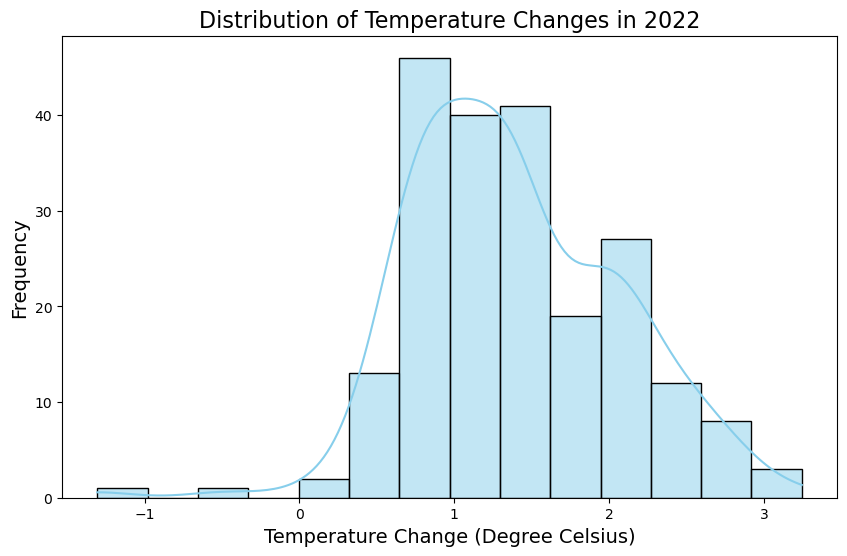

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size for better readability
plt.figure(figsize=(10, 6))

# Create the histogram for temperature changes in 2022
sns.histplot(df['F2022'], color='skyblue', kde=True)

# Add a title to the plot
plt.title('Distribution of Temperature Changes in 2022', fontsize=16)

# Label the axes
plt.xlabel('Temperature Change (Degree Celsius)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()
